In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import multipendulum as mp

%matplotlib inline

In [2]:
theta0res = pd.read_pickle("theta0-1600-100-MB.pkl")
theta1res = pd.read_pickle("theta1-1600-100-MB.pkl")

## Examining Transition to Chaos via dimension of the invariant manifold

One way to determine whether or not the motion of a particular system is chaotic is to look at the dimensionality of the invariant manifold (the subset of phase space on which its trajectories reside. In dissipative systems, this would be called the *attractor*, but that language isn't quite correct in this case). The rule of thumb is that the phase space trajectories of chaotic systems live on strange attractors---that is, invariant manifolds with fractional dimension.

In the double pendulum system, the phase space is four dimensional. Introducing the constraint that energy is conserved reduces the number of degrees of freedom (and therefore the dimension of the invariant manifold) by 1. Our algorithm underestimates the dimension for two reasons: we're looking at a discrete approximaton to a continuous geometric object, and (more importantly) the simulations used run for finite time.

The asymptotic approach to dim = 2.8 in the plot is *probably* actually an approach to 3, but it's hard to say without further study. The transition to chaos is clearly visible at $E\approx 5.75$. Interestingly, this chaotic window is short lived if the energy starts in the outer pendulum; the dimension quickly drops back below 3 until a much higher energy ($\approx 9$) is reached.

Things we should try to understand: the 3 major drops in dimensionality shown on the graph as v-shaped ravines.

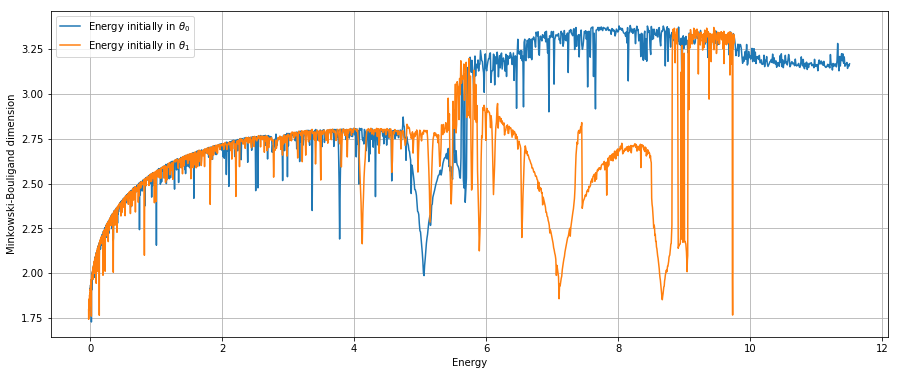

In [3]:
E0 = theta0res.energy.iloc[0]
plt.plot(theta0res.energy-E0, theta0res.MBdim, color="C0", label=r"Energy initially in $\theta_0$")
plt.plot(theta1res.energy-E0, theta1res.MBdim, color="C1", label=r"Energy initially in $\theta_1$")
fig = plt.gcf()
fig.set_figwidth(15)
fig.set_figheight(6)
plt.legend(loc="upper left", bbox_to_anchor=(0,1))
plt.ylabel("Minkowski-Bouligand dimension")
plt.xlabel("Energy")
plt.grid()

We can also include initial conditions which line up with the linear eigenmodes. We will designate the in-phase mode as $\phi_0$ and the out of phase mode as $\phi_1$.

In [4]:
phi0res = pd.read_pickle("phi0-1600-20-MB.pkl")
phi1res = pd.read_pickle("phi1-1600-20-MB.pkl")

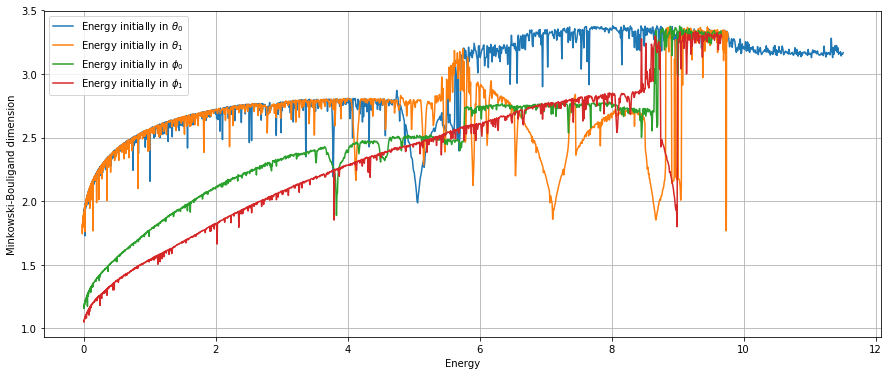

In [5]:
E0 = theta0res.energy.iloc[0]
plt.plot(theta0res.energy-E0, theta0res.MBdim, color="C0", label=r"Energy initially in $\theta_0$")
plt.plot(theta1res.energy-E0, theta1res.MBdim, color="C1", label=r"Energy initially in $\theta_1$")
plt.plot(phi0res.energy-E0-5.0, phi0res.MBdim, color="C2", label=r"Energy initially in $\phi_0$")
plt.plot(phi1res.energy-E0-5.0, phi1res.MBdim, color="C3", label=r"Energy initially in $\phi_1$")

fig = plt.gcf()
fig.set_figwidth(15)
fig.set_figheight(6)
plt.legend(loc="upper left", bbox_to_anchor=(0,1))
plt.ylabel("Minkowski-Bouligand dimension")
plt.xlabel("Energy")
plt.grid()

## Type and amount of growth in separation

When two instances of a chaotic system are placed in *nearly* identical initial conditions and allowed to evolve, the state of the two systems quickly diverges. Informally, we refer to this as a sensitive dependence on initial conditions. More formally, the separation increases exponentially in time $$\delta z \sim e^{\lambda_0 t},$$ and we refer to the growth rate $\lambda_0$ as the Lyapunov exponent. The rule of thumb is that chaotic systems have a positive Lyapunov exponent, and in nonchaotic systems $\lambda_0$ is either zero or negative. 

While nonchaotic systems don't exhibit exponential growth in separation between instances with similar initial conditions, it is possible for such systems to have slower (power law) growth $$ \delta z \sim t^b $$ *if they are non-dissipative*. In dissipative systems, the attractive nature of the invariant manifold tends to damp out this kind of growth, and it isn't observed.

The double pendulum system has no dissipation, and as such, estimates of the Lyapunov exponent need to be careful not to fit an exponential model to power law growth and up with a spurious value for $\lambda_0$.

In an effort to address this, we compared quality of fit (using a mean squared error criterion) for both exponential and power law models over a range of energies. If the overall MSE was smaller for the exponential growth model than for the power law growth model, that run was designated as exhibiting exponential growth. Since the amount of growth is somewhat sensitive to initial perturbation, this procedure was repeated with a number of random perturbations of constant magnitude.

Text(0.5,0,'Energy')

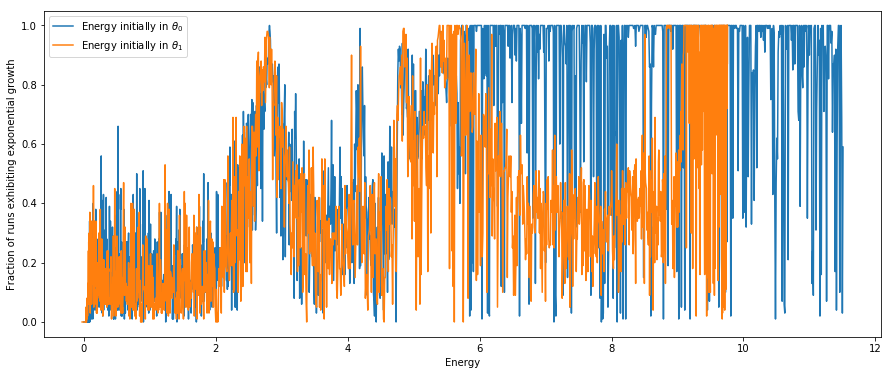

In [6]:
E0 = theta0res.energy.iloc[0]
plt.plot(theta0res.energy-E0, theta0res.lins/100, color="C0", label=r"Energy initially in $\theta_0$")
plt.plot(theta1res.energy-E0, theta1res.lins/100, color="C1", label=r"Energy initially in $\theta_1$")
fig = plt.gcf()
fig.set_figwidth(15)
fig.set_figheight(6)
plt.legend(loc="upper left", bbox_to_anchor=(0,1))
plt.ylabel("Fraction of runs exhibiting exponential growth")
plt.xlabel("Energy")

A moving window average was used to smooth out some of the noise to make the graph easier to read.

In [7]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

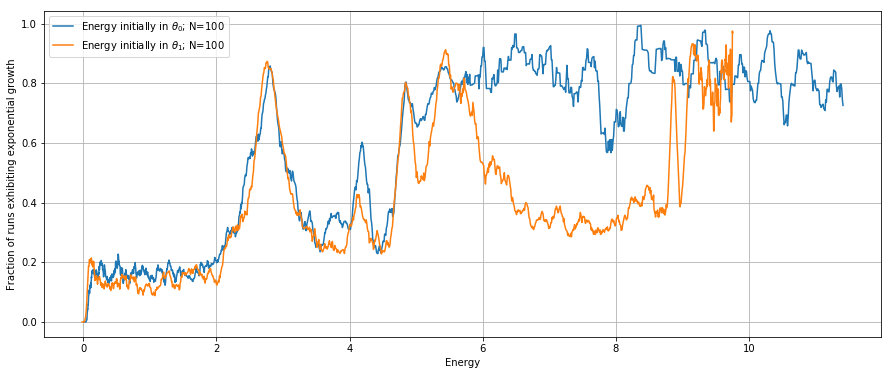

In [8]:
E0 = theta0res.energy.iloc[0]
xvals = (theta0res.energy-E0).values
yvals = moving_average((theta0res.lins/100).values, 21)
plt.plot(xvals[10:-10], yvals, color="C0", label=r"Energy initially in $\theta_0$; N=100")

xvals = theta1res.energy-E0
yvals = moving_average((theta1res.lins/100).values, 21)
plt.plot(xvals[10:-10], yvals, color="C1", label=r"Energy initially in $\theta_1$; N=100")
fig = plt.gcf()
fig.set_figwidth(15)
fig.set_figheight(6)
plt.legend(loc="upper left", bbox_to_anchor=(0,1))
plt.ylabel("Fraction of runs exhibiting exponential growth")
plt.xlabel("Energy")
plt.grid()
#ax = plt.gca()
#energies = np.array([0, 2.8, 4.125, 5.05, 5.15, 5.74, 7.1, 8, 8.67, 9.5])
#ax.vlines(energies, ymin=0, ymax=1, color="C2")

The distinction between chaotic and nonchaotic behavior in this graph is relatively clear (though the peak at around $E\approx 2.75$ needs some explanation), and both the general trend and the energies at which transitions happen are the same between this graph and the previous one (showing dimension).

Lastly, we have the actual estimates of the growth rate in an exponential model. These numbers only make sense where the exponential model is better than the power law model (so above $E\approx 5.75$ for the blue curve and above $E\approx 8.75$ for the orange curve); we see that we could use the magnitude of the measured Lyapunov exponent as a proxy for whether it's actually exponential growth. Below a cutoff (which we would have to look closely at the graph to find if we wanted a numerical value) the power law is better, so we don't have exponential growth.

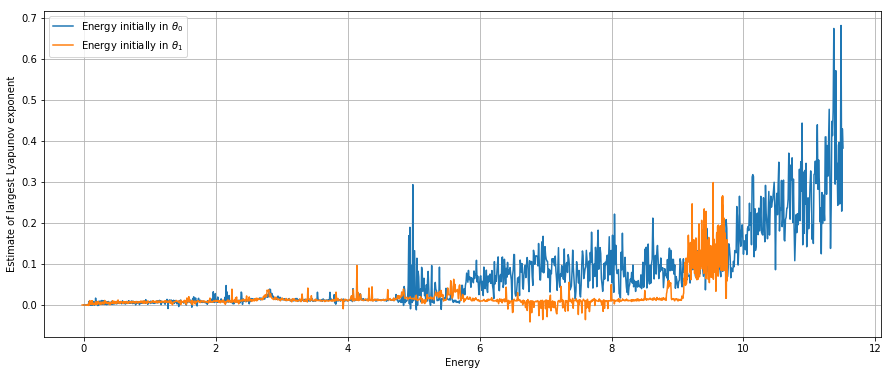

In [9]:
E0 = theta0res.energy.iloc[0]
plt.plot(theta0res.energy-E0, theta0res.lmean, color="C0", label=r"Energy initially in $\theta_0$")
plt.plot(theta1res.energy-E0, theta1res.lmean, color="C1", label=r"Energy initially in $\theta_1$")
fig = plt.gcf()
fig.set_figwidth(15)
fig.set_figheight(6)
plt.legend(loc="upper left", bbox_to_anchor=(0,1))
plt.ylabel("Estimate of largest Lyapunov exponent")
plt.xlabel("Energy")
plt.grid()

## Poincare plots along the road to chaos

### First case: Energy initially in $\theta_0$

(1.75, 3.5)

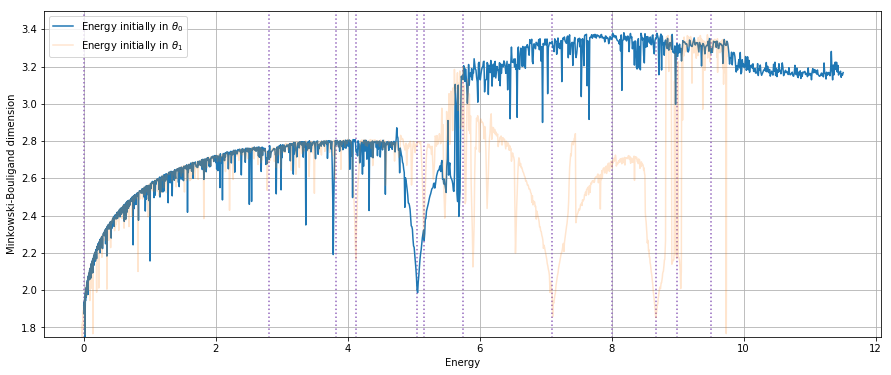

In [23]:

E0 = theta0res.energy.iloc[0]
plt.plot(theta0res.energy-E0, theta0res.MBdim, color="C0", label=r"Energy initially in $\theta_0$",)
plt.plot(theta1res.energy-E0, theta1res.MBdim, color="C1", label=r"Energy initially in $\theta_1$", alpha=0.2)
fig = plt.gcf()
fig.set_figwidth(15)
fig.set_figheight(6)
plt.legend(loc="upper left", bbox_to_anchor=(0,1))
plt.ylabel("Minkowski-Bouligand dimension")
plt.xlabel("Energy")
plt.grid()
ax = plt.gca()
energies = np.array([0, 2.8, 3.825, 4.125, 5.05, 5.15, 5.74, 7.1, 8, 8.67, 8.99, 9.5])
ax.vlines(energies, ymin=1, ymax=4, color="C4", linestyle=":")
ax.set_ylim(1.75, 3.5)
#plt.xlim(8.6,8.8)

In [11]:
indices = [np.argmax(theta0res.energy.values >= (energy + E0) ) for energy in energies]

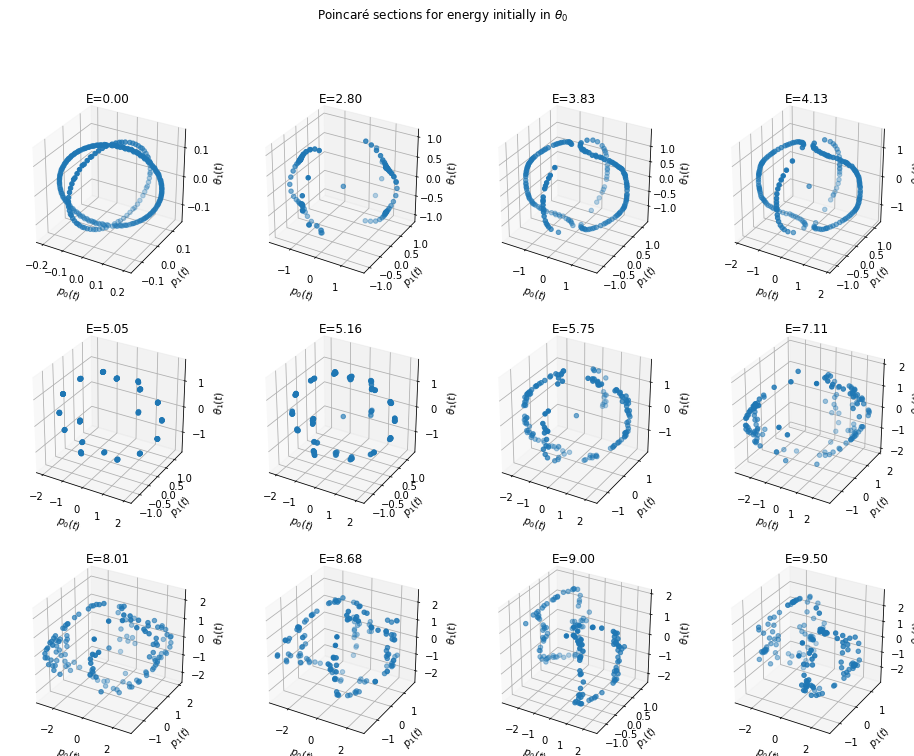

In [12]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(12)
fig.suptitle(r"Poincaré sections for energy initially in $\theta_0$")
for idx, item in enumerate(indices):
    ax = fig.add_subplot(3,4,idx+1, projection='3d')
    pend = mp.run_mp(theta0res.ic.iloc[item])
    mp.poincare(pend, ax)
    ax.set_title("E={:4.2f}".format(theta0res.energy.iloc[item]-E0))


### Second case: energy initially in $\theta_1$

(1.75, 3.5)

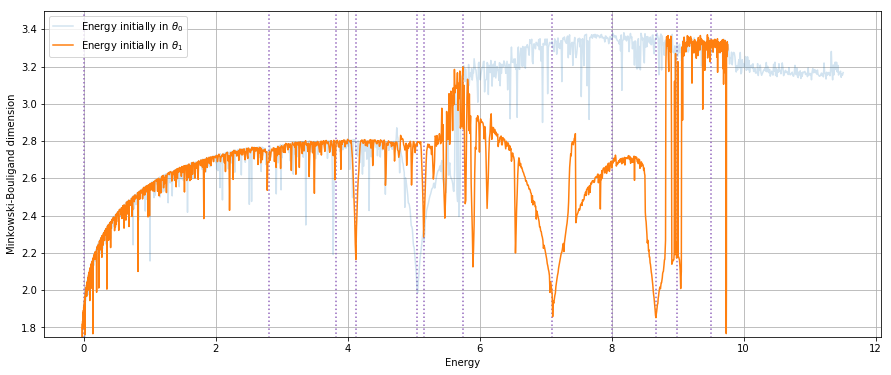

In [13]:
E0 = theta0res.energy.iloc[0]
plt.plot(theta0res.energy-E0, theta0res.MBdim, color="C0", label=r"Energy initially in $\theta_0$", alpha=0.2)
plt.plot(theta1res.energy-E0, theta1res.MBdim, color="C1", label=r"Energy initially in $\theta_1$", )
fig = plt.gcf()
fig.set_figwidth(15)
fig.set_figheight(6)
plt.legend(loc="upper left", bbox_to_anchor=(0,1))
plt.ylabel("Minkowski-Bouligand dimension")
plt.xlabel("Energy")
plt.grid()
ax = plt.gca()
ax.vlines(energies, ymin=1, ymax=4, color="C4", linestyle=":")
ax.set_ylim(1.75, 3.5)

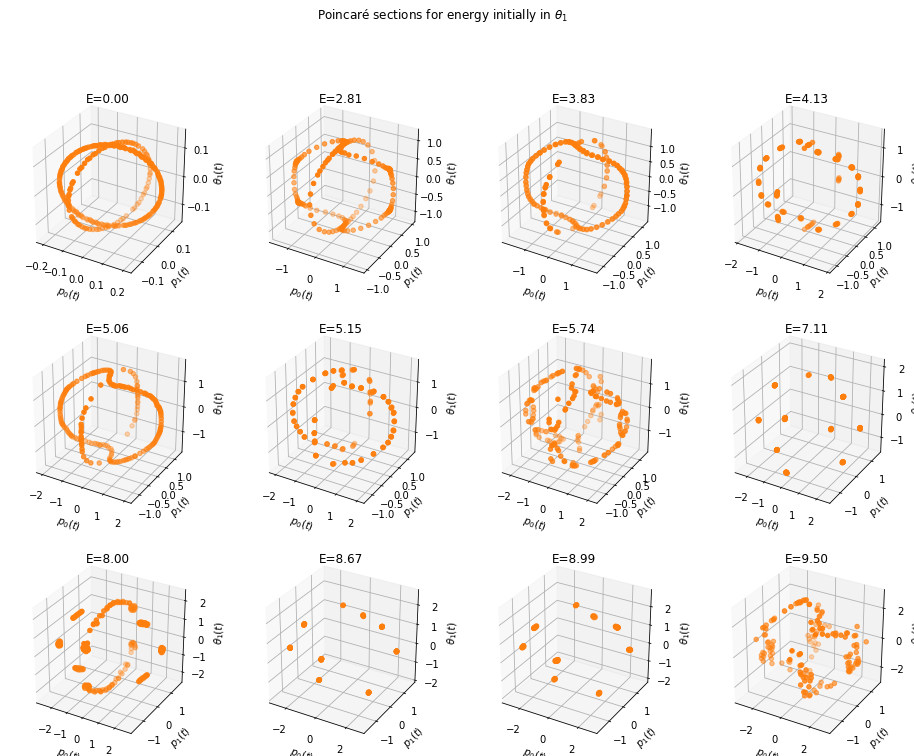

In [14]:
indices = [np.argmax(theta1res.energy.values >= (energy + E0) ) for energy in energies]
fig = plt.figure()
fig.suptitle(r"Poincaré sections for energy initially in $\theta_1$")
fig.set_figwidth(16)
fig.set_figheight(12)
for idx, item in enumerate(indices):
    ax = fig.add_subplot(3,4,idx+1, projection='3d')
    pend = mp.run_mp(theta1res.ic.iloc[item])
    mp.poincare(pend, ax, color="C1")
    ax.set_title("E={:4.2f}".format(theta1res.energy.iloc[item]-E0))


(1.0, 3.5)

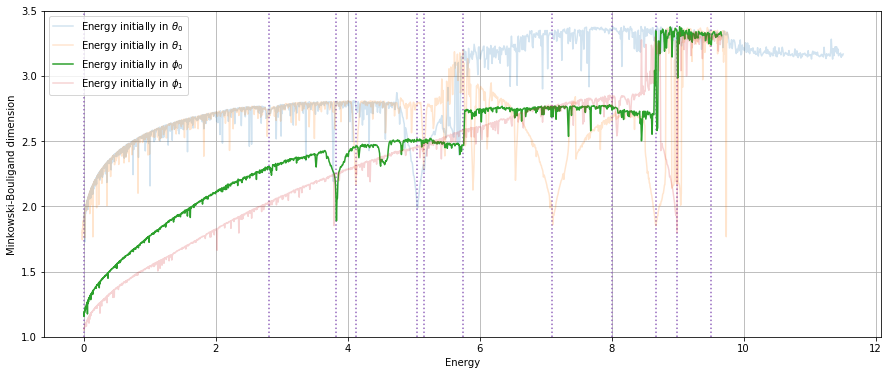

In [21]:
E0 = theta0res.energy.iloc[0]
plt.plot(theta0res.energy-E0, theta0res.MBdim, color="C0", label=r"Energy initially in $\theta_0$", alpha=0.2)
plt.plot(theta1res.energy-E0, theta1res.MBdim, color="C1", label=r"Energy initially in $\theta_1$", alpha=0.2)
plt.plot(phi0res.energy-E0-5.0, phi0res.MBdim, color="C2", label=r"Energy initially in $\phi_0$")
plt.plot(phi1res.energy-E0-5.0, phi1res.MBdim, color="C3", label=r"Energy initially in $\phi_1$", alpha=0.2)
fig = plt.gcf()
fig.set_figwidth(15)
fig.set_figheight(6)
plt.legend(loc="upper left", bbox_to_anchor=(0,1))
plt.ylabel("Minkowski-Bouligand dimension")
plt.xlabel("Energy")
plt.grid()
ax = plt.gca()
ax.vlines(energies, ymin=1, ymax=4, color="C4", linestyle=":")
ax.set_ylim(1.0, 3.5)


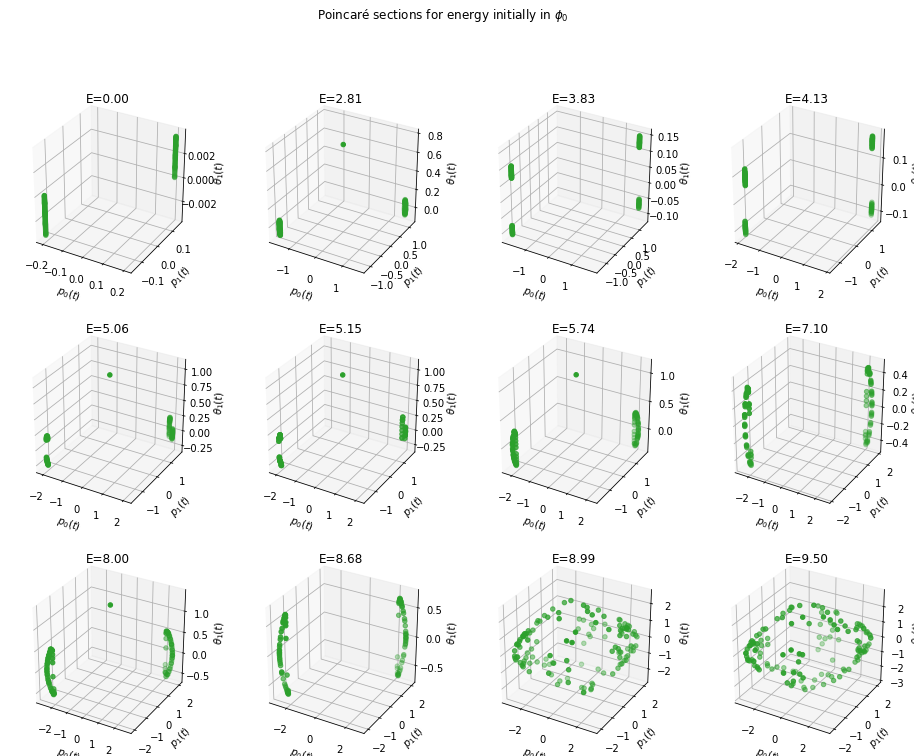

In [16]:
indices = [np.argmax(phi0res.energy.values >= (energy + E0 + 5.0) ) for energy in energies]
fig = plt.figure()
fig.suptitle(r"Poincaré sections for energy initially in $\phi_0$")
fig.set_figwidth(16)
fig.set_figheight(12)
for idx, item in enumerate(indices):
    ax = fig.add_subplot(3,4,idx+1, projection='3d')
    pend = mp.run_mp(phi0res.ic.iloc[item], eigenmodes=True)
    mp.poincare(pend, ax, color="C2")
    ax.set_title("E={:4.2f}".format(phi0res.energy.iloc[item]-E0-5.0))


(1.0, 3.5)

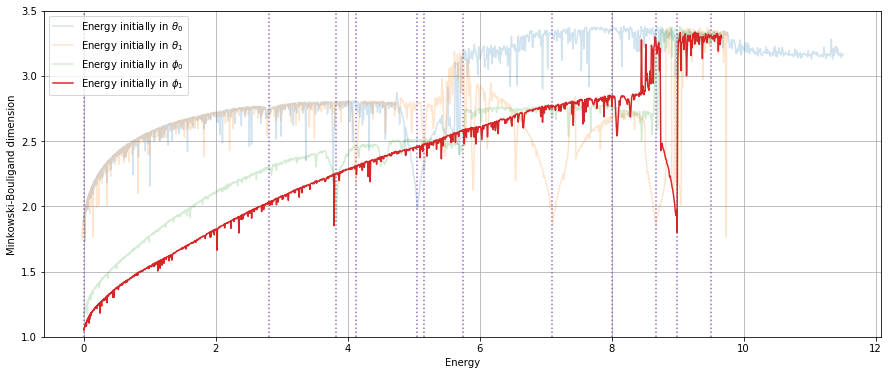

In [17]:
E0 = theta0res.energy.iloc[0]
plt.plot(theta0res.energy-E0, theta0res.MBdim, color="C0", label=r"Energy initially in $\theta_0$", alpha=0.2)
plt.plot(theta1res.energy-E0, theta1res.MBdim, color="C1", label=r"Energy initially in $\theta_1$", alpha=0.2)
plt.plot(phi0res.energy-E0-5.0, phi0res.MBdim, color="C2", label=r"Energy initially in $\phi_0$", alpha=0.2)
plt.plot(phi1res.energy-E0-5.0, phi1res.MBdim, color="C3", label=r"Energy initially in $\phi_1$",)
fig = plt.gcf()
fig.set_figwidth(15)
fig.set_figheight(6)
plt.legend(loc="upper left", bbox_to_anchor=(0,1))
plt.ylabel("Minkowski-Bouligand dimension")
plt.xlabel("Energy")
plt.grid()
ax = plt.gca()
ax.vlines(energies, ymin=1, ymax=4, color="C4", linestyle=":")
ax.set_ylim(1.0, 3.5)


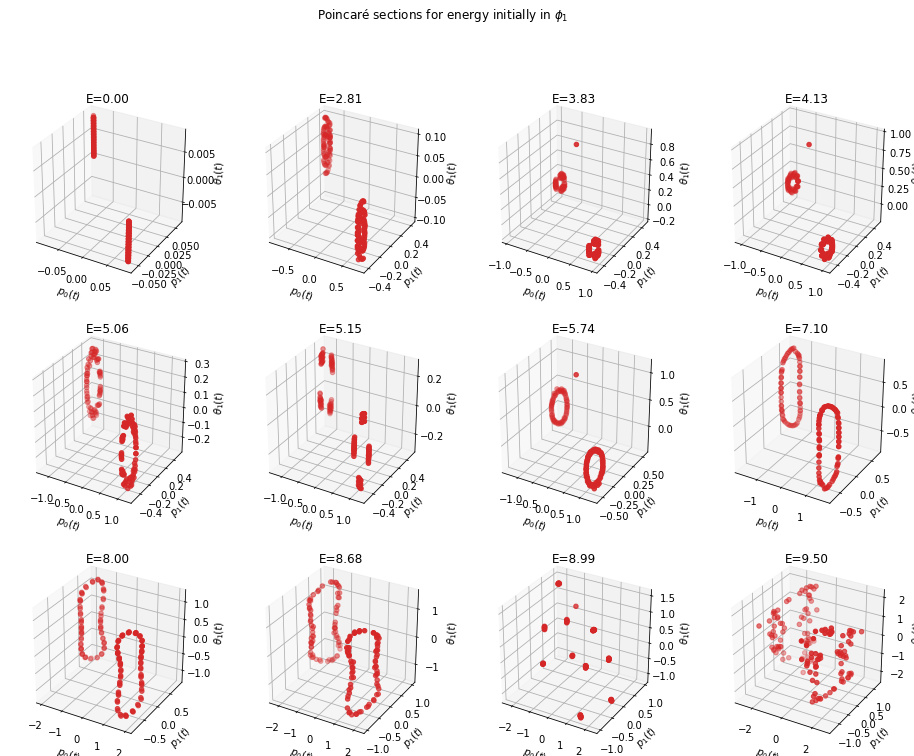

In [18]:
indices = [np.argmax(phi1res.energy.values >= (energy + E0 + 5.0) ) for energy in energies]
fig = plt.figure()
fig.suptitle(r"Poincaré sections for energy initially in $\phi_1$")
fig.set_figwidth(16)
fig.set_figheight(12)
for idx, item in enumerate(indices):
    ax = fig.add_subplot(3,4,idx+1, projection='3d')
    pend = mp.run_mp(phi1res.ic.iloc[item], eigenmodes=True)
    mp.poincare(pend, ax, color="C3")
    ax.set_title("E={:4.2f}".format(phi1res.energy.iloc[item]-E0-5.0))
